In [18]:
import pandas as pd
import numpy as np
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
md_para = pd.read_csv('../data/substituted_benzene_para_md.csv')
md_orth = pd.read_csv('../data/substituted_benzene_orth_md.csv')
md_meta = pd.read_csv('../data/substituted_benzene_meta_md.csv')
md = pd.concat([md_meta,md_orth,md_para],axis=0,join='inner',ignore_index=True)
gammadata_meta = pd.read_csv('../data/substituted_benzene_meta_gamma.csv')
gammadata_orth = pd.read_csv('../data/substituted_benzene_orth_gamma.csv')
gammadata_para = pd.read_csv('../data/substituted_benzene_para_gamma.csv')
gammadata = pd.concat([gammadata_meta,gammadata_orth,gammadata_para],axis=0,join='inner',ignore_index=True)

result = pd.merge(md, gammadata, on='cindex')
result = result[(result['magnitude_gamma'] < 26000)]


In [20]:
X = result.iloc[:, 1:-4]
X = X[X.T[X.dtypes!=np.object].index]
X = np.array(X, dtype = np.float32)
st = StandardScaler()
X= st.fit_transform(X)

In [21]:
Y = result.iloc[:, -1]
Y = np.array(Y, dtype = np.float32)
#Y=(Y-5200)/20800


In [22]:
Y=Y.reshape(-1,1)
Y=st.fit_transform(Y)

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=42)
model = Sequential()
model.add(Dense(units = 50, input_dim = X.shape[1]))
#model.add(Dense(units=50,activation='relu'))
model.add(Activation('sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                64350     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 64,401
Trainable params: 64,401
Non-trainable params: 0
_________________________________________________________________


In [24]:
#model.compile(loss = 'mean_squared_error', optimizer = SGD(lr = 0.001, momentum = 0.9, nesterov = True),metrics=['accuracy'])
model.compile(loss = 'mae', optimizer = SGD(lr = 0.001, momentum = 0.9, nesterov = True),metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 400, batch_size = 32,validation_data = (X_test, y_test),verbose=0)
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)
rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5
print("Neural Network RMS", rms)

Test loss: 0.388841837644577
Test accuracy: 0.0
Neural Network RMS 0.5822532793561178


In [27]:
score

[0.388841837644577, 0.0]

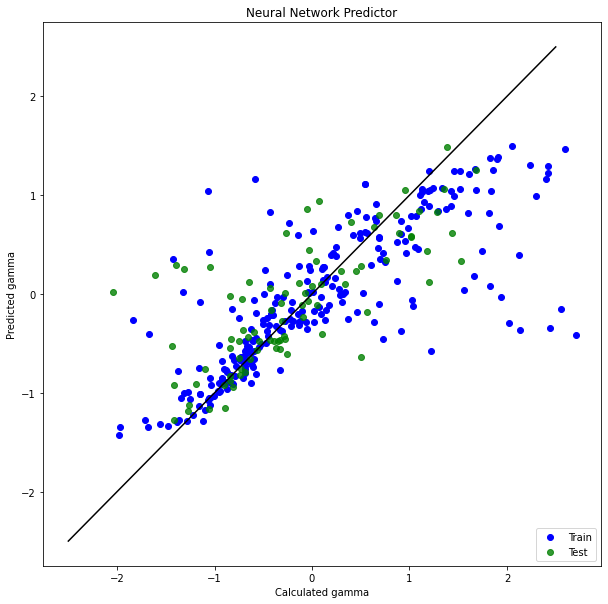

In [25]:
plt.figure(figsize=(10,10))
plt.title('Neural Network Predictor')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.xlabel('Calculated gamma')
plt.ylabel('Predicted gamma')
plt.scatter(y_train, model.predict(X_train), label = 'Train', c = 'blue')
plt.scatter(y_test, model.predict(X_test), c = 'green', label = 'Test', alpha = 0.8)
#plt.hist(Y,bins=10)
plt.plot([-2.5,2.5],[-2.5,2.5],c = 'k')
plt.legend(loc = 4)
#plt.savefig('Neural Network Predictor.png', dpi=500)
plt.show()

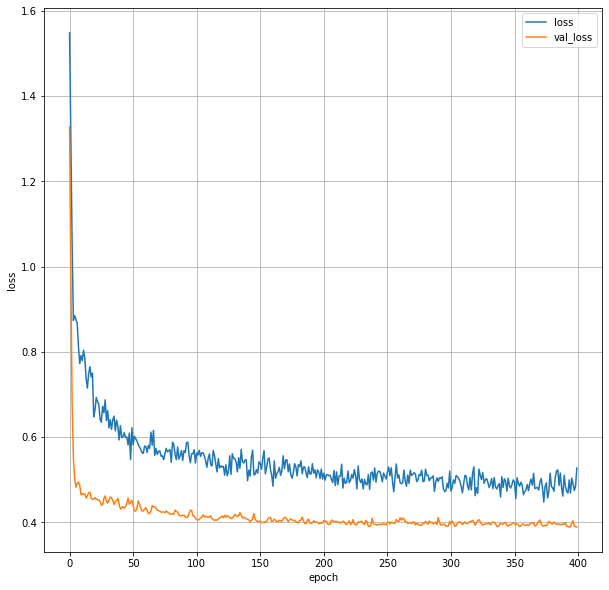

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.figure(figsize=(10,10))
#plt.ylim(0,0.2)
plt.plot(range(epochs), loss, label = 'loss')
plt.plot(range(epochs), val_loss, label = 'val_loss')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('loss & val_loss for epochs.png', dpi=500)
plt.show()

In [16]:
# Convolutional Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
hidden1 = Dense(10, activation='relu')(pool2)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())# 
#plot graphplot_model(model, to_file='convolutional_neural_network.png')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 13, 13, 10)        170       
_________________________________________________________________
dense_5 (Dense)              (None, 13, 13, 1)         11  